In [2]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dunestyle.matplotlib as dunestyle

In [3]:
#path = '/media/leoperes/Acer/Users/le0_p/'
path='~/Dropbox/BoostedDM/ntuples2023/'

In [4]:
fAtm_00a = ROOT.TFile.Open(path+'atm_hA_BR_4ana_syst_new.root')

In [6]:
reco = fAtm_00a.Get("ana/Atm")
true = fAtm_00a.Get("ana/AllEvents")

In [8]:
nReco = reco.GetEntries()

In [9]:
nReco

55047

In [10]:
Chi_Method_arr = []
AllP_Method_arr = []
AllMu_Method_arr = []
LongTrack_Method_arr = []

In [17]:
for r in reco:
    iEvt = r.event
    Chi_Method = r.DiffCosAngleTotalMom
    AllP_Method = r.DiffCosAngleTotalMom_AllProtons
    AllMu_Method = r.DiffCosAngleTotalMom_AllMuons
    LongTrack_Method = r.DiffCosAngleLongestTrack
    
    Chi_Method_arr.append(Chi_Method)
    AllP_Method_arr.append(AllP_Method)
    AllMu_Method_arr.append(AllMu_Method)
    LongTrack_Method_arr.append(LongTrack_Method)
    
Chi_Method_arr = np.array(Chi_Method_arr)
AllP_Method_arr = np.array(AllP_Method_arr)
AllMu_Method_arr = np.array(AllMu_Method_arr)
LongTrack_Method_arr = np.array(LongTrack_Method_arr)

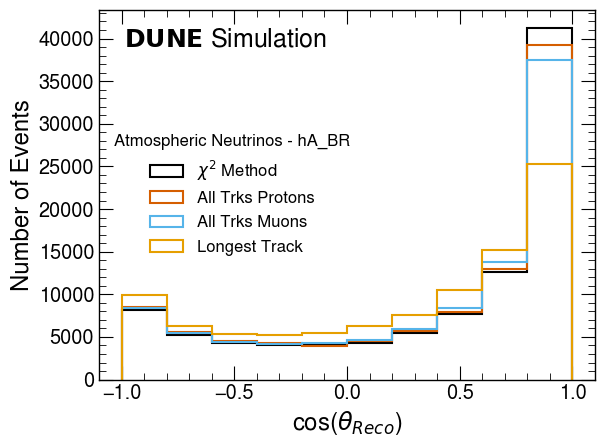

In [24]:
plt.figure()

plt.hist(Chi_Method_arr[LongTrack_Method_arr>-1.5], label =r'$\chi^2$ Method', histtype='step')
plt.hist(AllP_Method_arr[LongTrack_Method_arr>-1.5], label =r'All Trks Protons', histtype='step')
plt.hist(AllMu_Method_arr[LongTrack_Method_arr>-1.5], label =r'All Trks Muons', histtype='step')
plt.hist(LongTrack_Method_arr[LongTrack_Method_arr>-1.5],label ='Longest Track', histtype='step')

plt.legend(title= 'Atmospheric Neutrinos - hA_BR', title_fontsize = 12)
plt.xlabel(r'cos($\theta_{Reco}$)')
plt.ylabel('Number of Events')

dunestyle.Simulation()
plt.savefig('AngularStudiesPlots/VtxDistanceReco_Methods.pdf', format='pdf', dpi=300)
plt.show()